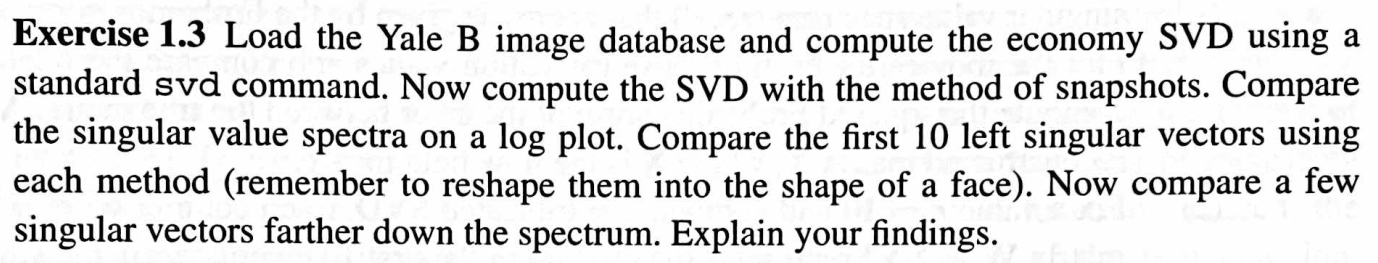

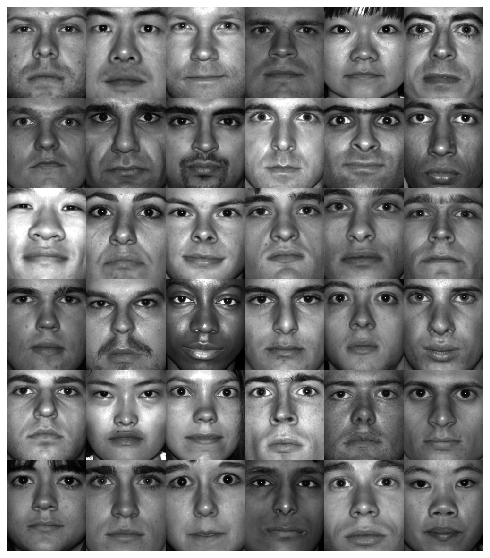

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import scipy.io
plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams.update({'font.size': 18})

mat_contents = scipy.io.loadmat(os.path.join('.','DATA','allFaces.mat'))
faces = mat_contents['faces']
m = int(mat_contents['m'])
n = int(mat_contents['n'])
nfaces = np.ndarray.flatten(mat_contents['nfaces'])

allPersons = np.zeros((n*6,m*6))
count = 0

for j in range(6):
    for k in range(6):
        allPersons[j*n : (j+1)*n, k*m : (k+1)*m] = np.reshape(faces[:,np.sum(nfaces[:count])],(m,n)).T
        count += 1
        
img = plt.imshow(allPersons)
img.set_cmap('gray')
plt.axis('off')
plt.show()

In [2]:
#SVD method for faces
U, S, VT = np.linalg.svd(faces, full_matrices=False) 

In [3]:
#SVD using method of snapshots
corr = faces.T @ faces

In [4]:
S_snap, V_snap = np.linalg.eig(corr)

In [9]:
S_snap = np.sqrt(abs(S_snap))

In [ ]:
S_snap_diag = np.diag(S_snap)
U_snap = faces @ V_snap @ np.linalg.inv(S_snap)

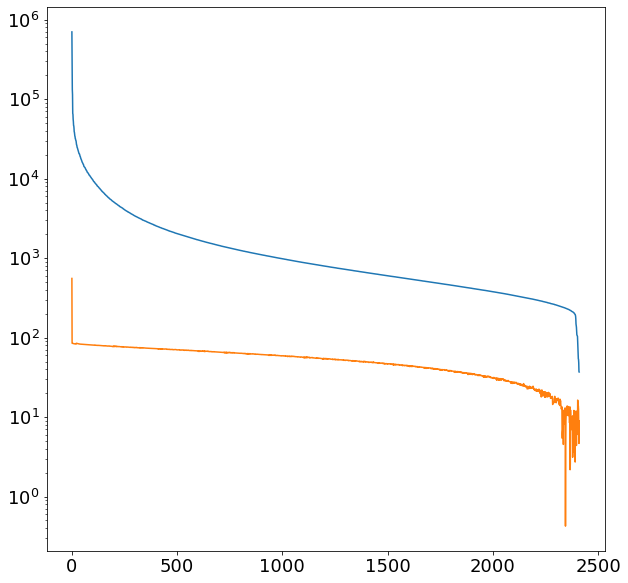

In [12]:
plt.plot(S)
plt.yscale('log')
plt.plot(S_snap)